In [10]:
#ignorar warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Cargar el dataset

In [12]:
df = pd.read_csv('../csv/titanic.csv')  # Update the path to the correct location

# 2. Mostrar primeras filas, tipos de datos, nulos y duplicados

In [13]:
print("-----Primeras Filas del DataFrame-----")
print(df.head())


-----Primeras Filas del DataFrame-----
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0        

In [14]:
print("\n-----Información del DataFrame-----")
df.info()



-----Información del DataFrame-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
print("\n-----Valores Nulos -----")
print(df.isnull().sum())
print("\n-----Valores Duplicados------")
print(df.duplicated().sum())


-----Valores Nulos -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-----Valores Duplicados------
0


# 3. Estadísticas descriptivas


In [16]:
print("\n-----Estadísticas Descriptivas-----")
print(df.describe())
print(df.describe(include='object'))


-----Estadísticas Descriptivas-----
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex  Ticket Ca

# 4. Limpiar datos 

In [17]:
# Tratar nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [18]:
# Codificar variables categóricas

# LabelEncoder para 'Sex' (binaria)
le = LabelEncoder()
df['Sex_Encoded'] = le.fit_transform(df['Sex'])
df.drop('Sex', axis=1, inplace=True)

# OneHotEncoder para 'Embarked' (nominal)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)


# 4. Visualizaciones básicas

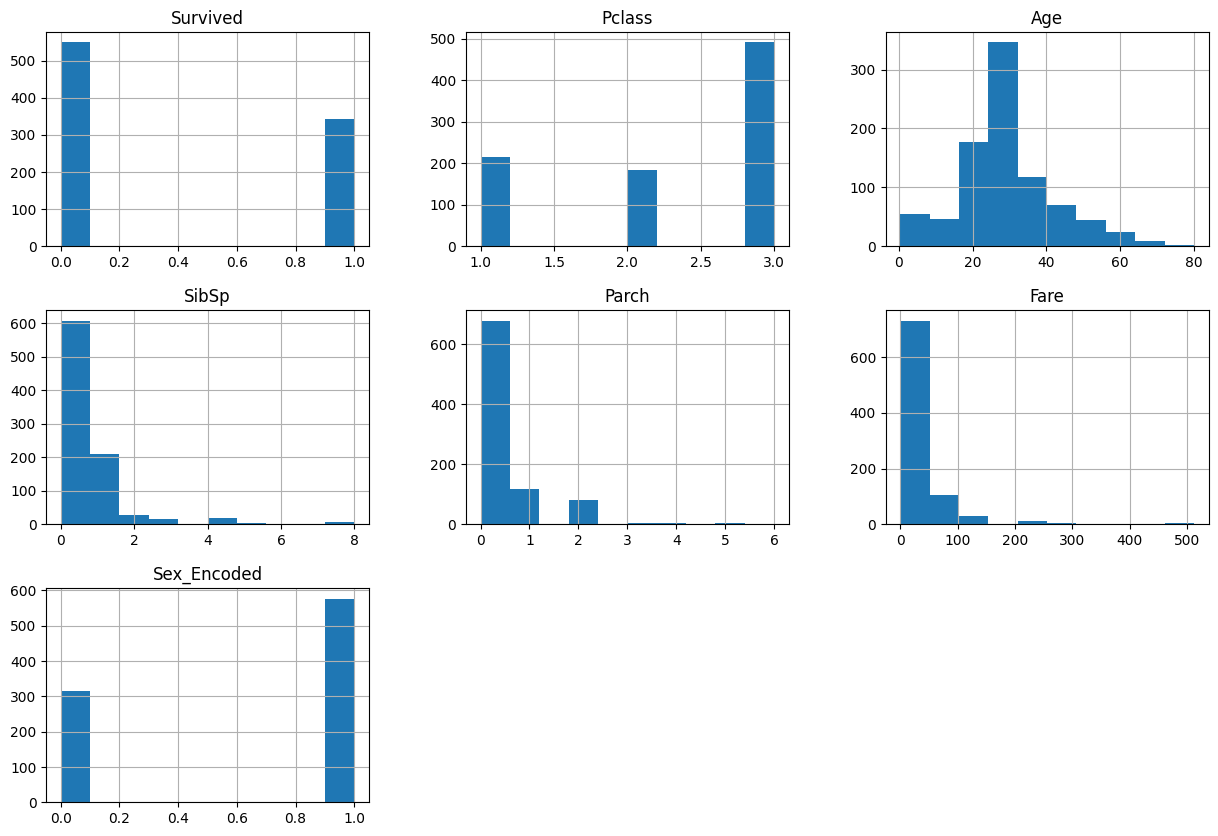

In [19]:
## Histogramas
df.hist(figsize=(15, 10))
plt.show()

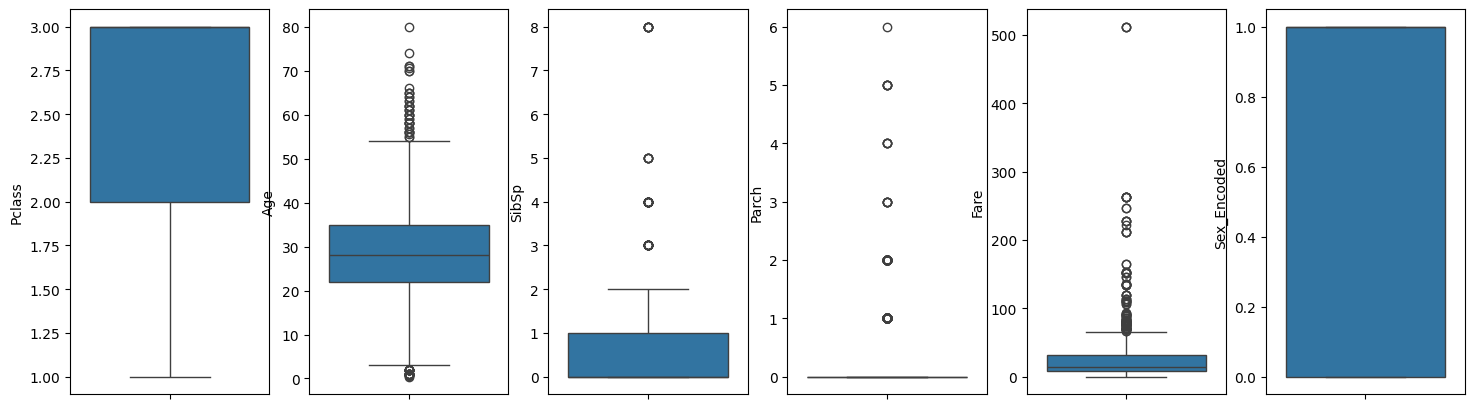

In [20]:
## Boxplots para Outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# Ahora solo quedan 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'
cols_to_boxplot = [col for col in numeric_cols if col not in ['Survived']]

fig, axes = plt.subplots(ncols=len(cols_to_boxplot), figsize=(18, 5))
for i, col in enumerate(cols_to_boxplot):
    sns.boxplot(y=df[col], ax=axes[i])
plt.show()

# 6. Exportar el DataFrame final a CSV


In [22]:

df.to_csv('../csv/titanic_eda_final.csv', index=False)